# Lab of computational physics - EXR07

#### Barone Francesco Pio, AY 2021/22 UniPD

In [1]:
# I will place the files for this notebook in a dedicated subdirectory
%cd ./07data

import numpy as np
import pandas as pd
from scipy import linalg as la
import matplotlib.pyplot as plt

/home/baronefr/Documents/lab_local/07data


1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [2]:
N = 2000

# generate the dataset
x1 = np.random.normal(loc=0, scale=1, size=N)  # (args) respectively: mean, std, size of vector
x2 = x1 + np.random.normal(loc=0, scale=3, size=N)
x3 = 2*x1 + x2
data = pd.DataFrame( { 'x1' : x1, 'x2' : x2, 'x3' : x3  } )

covmat = np.cov(data.T)
print('covariance matrix: shape', np.shape(covmat), f'\n {covmat}')

# eigen* of covariance matrix
l, V = la.eig(covmat)  # returns: eigenvalues, norm_eigenvectors
print('eigenvalues:\n ', l)
#print('eigenvectors:\n ', V)  # I suppress this output since it is not asked for the analysis

# eigen* using SVD
U, spectrum, Vt = np.linalg.svd(data)
l_svd = spectrum**2/(N-1)
V_svd = U
print('eigenvalues (SVD):\n ', l_svd)
#print('eigenvectors (SVD):\n ', V_svd) # I suppress this output since it is not asked for the analysis

# principal components
print('PCA:')
for lv in l[np.argsort(-l)]:
    print(' ', 100*(lv.real)/np.sum(l.real), '%')

covariance matrix: shape (3, 3) 
 [[ 1.01610203  0.92622592  2.95842998]
 [ 0.92622592  9.43901796 11.2914698 ]
 [ 2.95842998 11.2914698  17.20832976]]
eigenvalues:
  [ 2.56180707e+01+0.j -3.90759985e-16+0.j  2.04537905e+00+0.j]
eigenvalues (SVD):
  [2.56263317e+01 2.04755787e+00 3.54905966e-31]
PCA:
  92.606203975501 %
  7.393796024498992 %
  -1.4125497311417177e-15 %


We can observe that the eigenvalues for both the covariant matrix & SVD methods yield to the same result (permutations aside).

Almost 100% of the data are represented by the principal components. This makes sense, since the third variable was built on a linear combination of the first two.

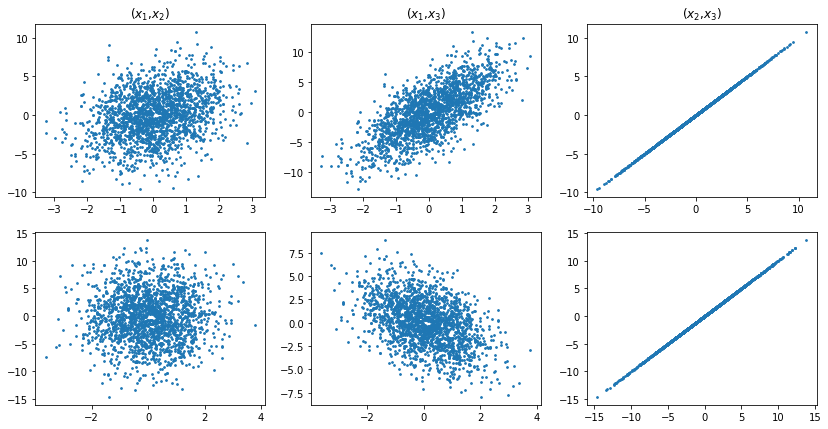

In [3]:
# redefine data in PCA basis
rdata = pd.DataFrame(np.dot(V, data.T).T)
rdata.columns = ['x1','x2','x3']
rdata

# plot scatter in original and new coords
fig, ax = plt.subplots(2, 3, figsize = (14,7))
 # 1st row: original vars
ax[0,0].scatter(data["x1"], data["x2"], s=3)
ax[0,1].scatter(data["x1"], data["x3"], s=3)
ax[0,2].scatter(data["x2"], data["x2"], s=3)
ax[0,0].set_title('($x_1$,$x_2$)')
ax[0,1].set_title('($x_1$,$x_3$)')
ax[0,2].set_title('($x_2$,$x_3$)')
 # 2nd row: original vars
ax[1,0].scatter(rdata["x1"], rdata["x2"], s=3)
ax[1,1].scatter(rdata["x1"], rdata["x3"], s=3)
ax[1,2].scatter(rdata["x2"], rdata["x2"], s=3)

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [4]:
nof_var = 10

# generate the additional data
for i in range(4,nof_var+4):
    this_mean = np.random.uniform(-1,1)
    print(f'variable x{i} of mean', this_mean)
    xb = np.random.normal(loc=this_mean, scale=1/50, size=N)
    data[f'x{i}'] = xb
data

variable x4 of mean -0.664985130628208
variable x5 of mean -0.6104555828050167
variable x6 of mean -0.4573524446784203
variable x7 of mean 0.4607512915176497
variable x8 of mean -0.8979158791132373
variable x9 of mean 0.775673377237132
variable x10 of mean -0.3716583073130335
variable x11 of mean -0.9175383853718118
variable x12 of mean 0.03444635023160125
variable x13 of mean 0.24728891281404586


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,0.640060,2.061949,3.342068,-0.679334,-0.612010,-0.496648,0.458428,-0.909374,0.764332,-0.364559,-0.887020,0.026080,0.257742
1,0.131640,-3.132601,-2.869322,-0.656875,-0.642063,-0.452900,0.459143,-0.879379,0.745730,-0.356671,-0.902602,0.028632,0.266947
2,-0.704351,-2.652889,-4.061591,-0.647273,-0.608500,-0.439872,0.422698,-0.911303,0.746259,-0.339365,-0.898435,0.050955,0.243067
3,0.607731,-2.738962,-1.523499,-0.629570,-0.600376,-0.447529,0.515716,-0.912266,0.755639,-0.364300,-0.905900,0.069328,0.248920
4,-1.660600,-5.380480,-8.701680,-0.644164,-0.630486,-0.455204,0.467134,-0.917491,0.757304,-0.387046,-0.932411,0.040475,0.263468
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.749452,2.622429,1.123525,-0.682792,-0.623749,-0.417141,0.437469,-0.877102,0.769872,-0.391530,-0.930032,0.016446,0.245061
1996,-1.141994,-8.263618,-10.547606,-0.652048,-0.620615,-0.465663,0.484553,-0.871094,0.739451,-0.387116,-0.905162,0.039883,0.264249
1997,-0.655615,1.347484,0.036255,-0.652227,-0.594487,-0.482417,0.456863,-0.909119,0.774332,-0.366077,-0.920751,0.051136,0.248702
1998,-0.444098,-1.957250,-2.845446,-0.671732,-0.640381,-0.476836,0.535460,-0.899230,0.758461,-0.402775,-0.891167,0.018936,0.256843


In [5]:
# I repeat the previous code:

covmat = np.cov(data.T)

# eigen* of covariance matrix
l, V = la.eig(covmat)  # returns: eigenvalues, norm_eigenvectors
print('eigenvalues:\n ', l)

# principal components
print('PCA:')
for lv in l[np.argsort(-l)]:
    print(' ', 100*(lv.real)/np.sum(l.real), '%')

eigenvalues:
  [ 2.56180718e+01+0.j  2.04538113e+00+0.j -1.14049700e-15+0.j
  4.45151316e-04+0.j  4.34909167e-04+0.j  3.53262546e-04+0.j
  4.17503126e-04+0.j  4.09837530e-04+0.j  4.01564510e-04+0.j
  3.68453261e-04+0.j  3.73886644e-04+0.j  3.92763888e-04+0.j
  3.85752866e-04+0.j]
PCA:
  92.59286544354731 %
  7.392738264561349 %
  0.0016089359188118627 %
  0.001571917129347026 %
  0.0015090054796326577 %
  0.0014812992749447603 %
  0.0014513976269705652 %
  0.0014195890325835508 %
  0.0013942486940949816 %
  0.0013513599276584916 %
  0.0013317217390233682 %
  0.0012768170682643009 %
  -4.1221636822880114e-15 %


Comparing the results with the 3D PCA, I observe that there is still a component which accounts for the majority of the variability of the dataset. Indeed, the results for the nD case are very similar to the 3D case.

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [6]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

--2021-12-12 22:05:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1,4M) [application/x-httpd-php]
Saving to: ‘/home/baronefr/data/magic04.data.1’

magic04.data.1      100%[===================>]   1,41M   527KB/s    in 2,7s    

2021-12-12 22:05:24 (527 KB/s) - ‘/home/baronefr/data/magic04.data.1’ saved [1477391/1477391]

--2021-12-12 22:05:24--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5400 (5,3K) [application/x-httpd-php]
Saving to: ‘/home/baronefr/data/magic04.names.1’

magic04.nam

End of file